In [1]:
import pandas as pd
import numpy as np

## 난수 발생을 위한 패키지
import random
## 그래프 표현을 위해 필요한 패키지
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# 한글 호환 문제
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rcParams['font.family'] = 'NanumBarunGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.font_manager as fm

!sudo apt-get install -y fonts-nanum

# 폰트 캐시 재설정
!sudo fc-cache -fv

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/뽀로로드/data(아파트시세_코랩가공)/onehotcoding(연식 평균 컬럼 추가).csv', encoding='cp949')
df.set_index('동', drop=True, inplace=True)
df.head()

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,Type_OneHot_Encoder_단독다가구,Type_OneHot_Encoder_아파트,Type_OneHot_Encoder_연립다세대,Type_OneHot_Encoder_오피스텔,평당전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,30.0,13.940659,20.914235,6.0,20200810.0,2020,8,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,748.978665
원효로2가,12.0,13.940659,20.914235,3.0,20200921.0,2020,9,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1396.825397
원효로2가,1.0,13.940659,20.914235,5.0,20200225.0,2020,2,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2997.981157
원효로2가,1.0,13.940659,20.914235,4.0,20200210.0,2020,2,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3031.062124
원효로2가,2.0,13.940659,20.914235,5.0,20200111.0,2020,1,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1902.358898


In [5]:
df_single = df.loc[df['Type_OneHot_Encoder_단독다가구']==1]
df_single.drop(['Type_OneHot_Encoder_단독다가구', 'Type_OneHot_Encoder_아파트', 'Type_OneHot_Encoder_연립다세대', 'Type_OneHot_Encoder_오피스텔'], axis=1, inplace=True)
df_single

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_성북구,Gu_OneHot_Encoder_송파구,Gu_OneHot_Encoder_양천구,Gu_OneHot_Encoder_영등포구,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,평당전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,52.0,13.940659,20.914235,1.0,20200723.0,2020,7,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1684.701190
원효로2가,82.0,13.940659,20.914235,1.0,20200102.0,2020,1,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1248.108926
원효로2가,65.0,13.940659,20.914235,1.0,20200519.0,2020,5,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2061.241428
원효로2가,27.0,13.940659,20.914235,1.0,20200925.0,2020,9,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,885.906040
원효로2가,28.0,13.940659,20.914235,1.0,20200725.0,2020,7,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2002.044062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
번동,35.0,22.724690,19.539600,1.0,20221215.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1176.815951
번동,29.0,22.724690,19.539600,1.0,20221216.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737.188920
번동,28.0,22.724690,19.539600,1.0,20221217.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330.000000


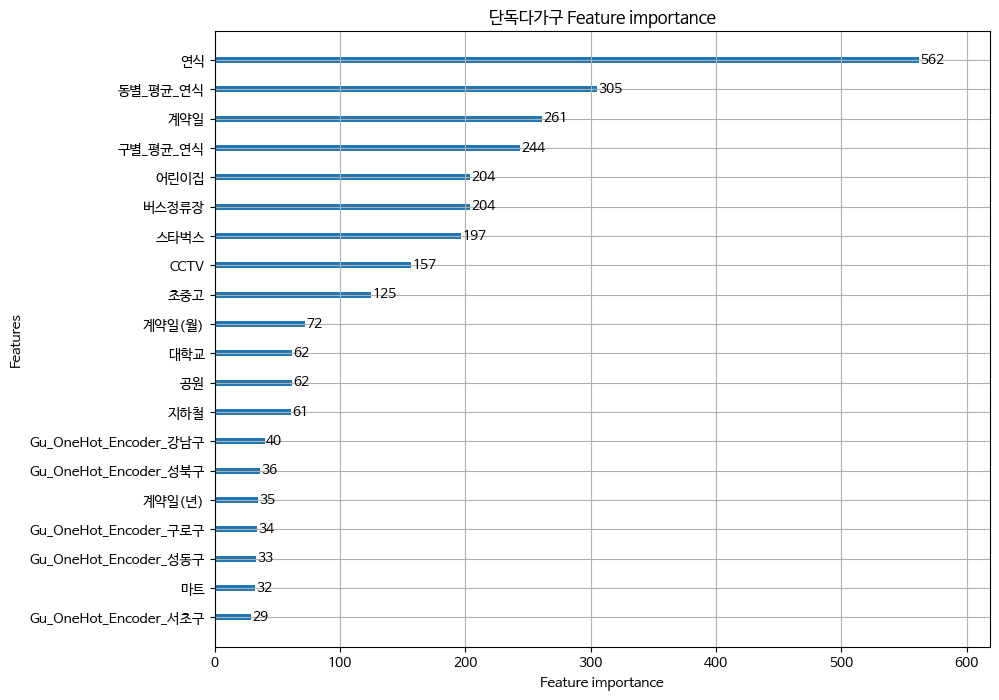

In [6]:
# 단독다가구
from lightgbm import LGBMRegressor
import lightgbm as lgb

X_features = df_single.iloc[:, :-1]
y_label = df_single.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

model = LGBMRegressor(max_depth=10, random_state=11, verbose=-1)
model.fit(X_train, y_train)

lgb.plot_importance(model, figsize=(10, 8), max_num_features=20, title='단독다가구 Feature importance')
plt.show()

Mean Absolute Error: 365.2202744763204
Mean Squared Error: 245453.1405910937
Root Mean Squared Error: 495.4322764930578
Mean Squared Log Error: 0.17673767937400653
R Squared: 0.44078432873909834
Mean Absolute Percentage Error: 38.333281594017926
Mean Percentage Error: -19.962327370128392
              실제값          예측값
동                             
가락동   1355.026463  1350.138535
가리봉동  1592.037918  1582.973295
가산동   1615.189899  1566.094485
가양동   1545.331495  1322.439064
가회동   1535.405834  1421.820018
...           ...          ...
효창동   1394.239655  1368.215005
후암동   1248.229947  1224.936102
휘경동   1649.695500  1569.635280
흑석동   1749.273757  1657.521010
흥인동   3031.658502  1641.740240

[357 rows x 2 columns]


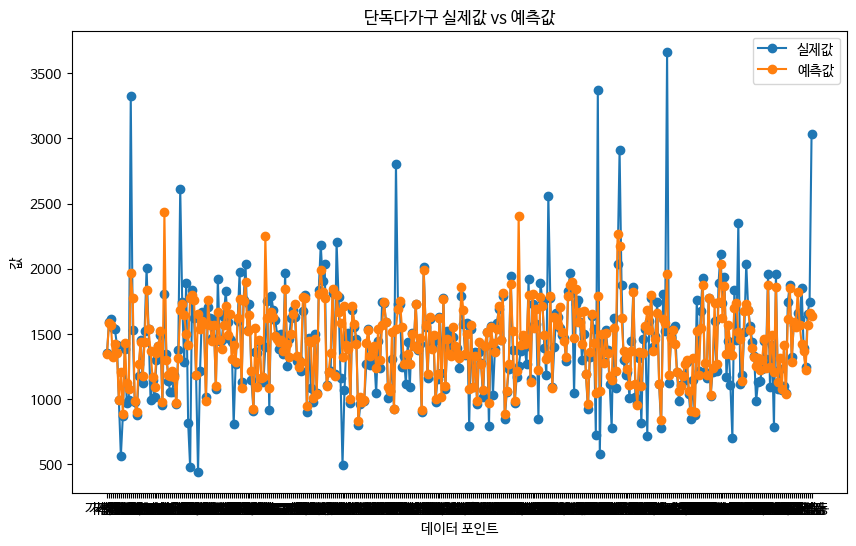

In [7]:
# 단독다가구
# LightGBM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

# 학습된 모델을 사용하여 예측
y_pred = model.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(10, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('단독다가구 실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()

In [8]:
# # 단독다가구
# # RandomizedSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# params = {
#     'n_estimators' : [100, 500 , 1000] , # 반복 횟수
#     'learning_rate' : [0.01 , 0.05 , 0.1 , 0.3] , # 러닝 메이트
#     'lambda_l1' : [0 , 10 , 20 , 30 ,50] , # L1 정규화
#     'lambda_l2' : [0 , 10 , 20 , 30 , 50] , # L2 정규화
#     'max_depth' : [5 , 10 , 15 , 20] , # 최대 깊이
#     'subsample' : [0.6 , 0.8 , 1] # 서브샘플 비율
# }

# model_2 = LGBMRegressor(random_state= 11) # 모델 객체 생성
# rs = RandomizedSearchCV(model_2 , param_distributions= params , n_iter= 30, random_state= 11 , n_jobs= -1) # 랜덤 그리드 서치 객체 생성
# rs.fit(X_train , y_train)
# rs.best_params_

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

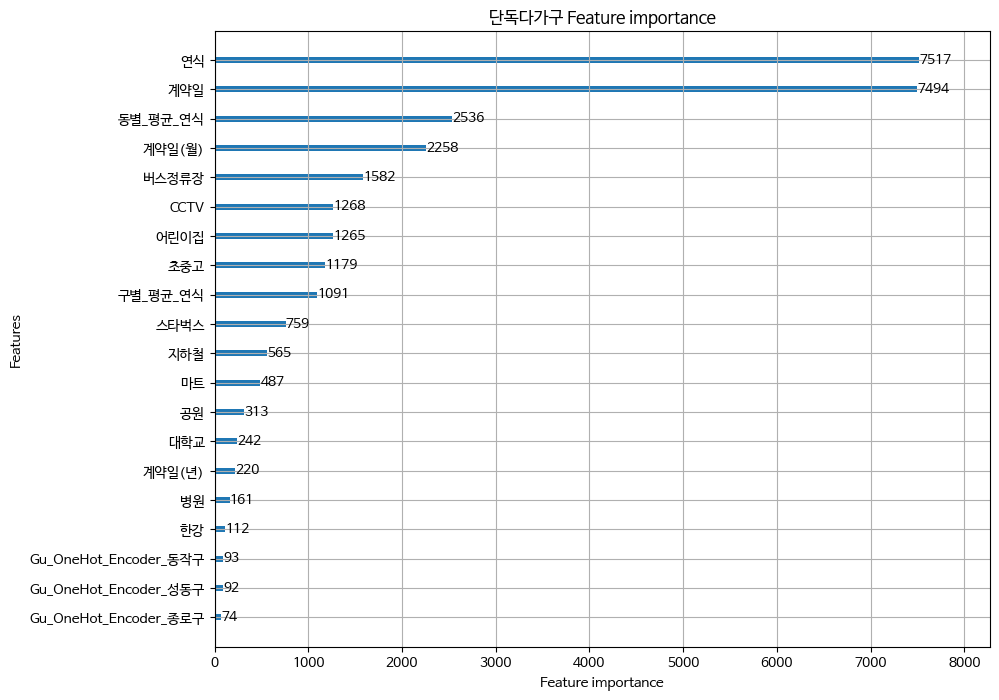

In [9]:
# 단독다가구
model_best = LGBMRegressor(n_estimators=1000,
                          learning_rate=0.3,
                          lambda_l1=10,
                          lambda_l2=30,
                          max_depth=20,
                          subsample=0.6,
                          random_state=11)
model_best.fit(X_train, y_train)

lgb.plot_importance(model_best, figsize=(10, 8), max_num_features=20, title='단독다가구 Feature importance')
plt.show()

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Absolute Error: 362.2125806424809
Mean Squared Error: 242750.60614546546
Root Mean Squared Error: 492.6972763730945
Mean Squared Log Error: 0.17498976037778113
R Squared: 0.44694151055587295
Mean Absolute Percentage Error: 37.90355745125644
Mean Percentage Error: -19.341742549856107
              실제값          예측값
동                             
가락동   1355.026463  1396.658952
가리봉동  1592.037918  1580.101090
가산동   1615.189899  1580.034609
가양동   1545.331495  1533.556627
가회동   1535.405834  1563.815009
...           ...          ...
효창동   1394.239655  1433.383248
후암동   1248.229947  1251.593130
휘경동   1649.695500  1606.852614
흑석동   1749.273757  1703.154731
흥인동   

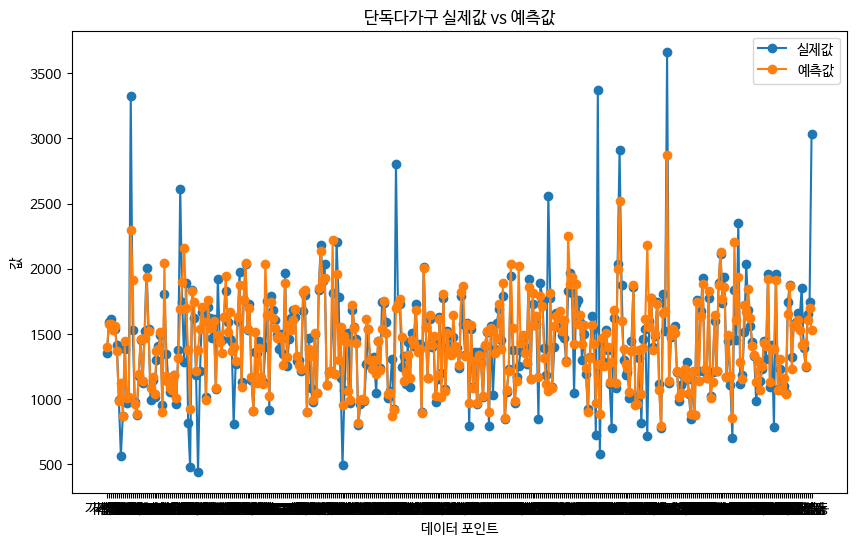

In [10]:
# 단독다가구
# 학습된 모델을 사용하여 예측
y_pred = model_best.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(10, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('단독다가구 실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()

In [11]:
compare_df
compare_df.loc[abs(compare_df['실제값']-compare_df['예측값']) == max(abs(compare_df['실제값']-compare_df['예측값']))]

,실제값,예측값
동,,
와룡동,3373.255575,1273.502362


In [12]:
df.loc[['와룡동']]

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,Type_OneHot_Encoder_단독다가구,Type_OneHot_Encoder_아파트,Type_OneHot_Encoder_연립다세대,Type_OneHot_Encoder_오피스텔,평당전세가
동,,,,,,,,,,,,,,,,,,,,,
와룡동,NaN,NaN,19.36861,1.0,20210226.0,2021,2,0.0,0.0,4.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3373.255575


In [13]:
df_log = pd.read_csv("/content/drive/MyDrive/뽀로로드/data(아파트시세_코랩가공)/onehotcoding(로그변환).csv", encoding='cp949')
df_log.set_index('동', drop=True, inplace=True)
df_log.head(3)

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,Type_OneHot_Encoder_단독다가구,Type_OneHot_Encoder_아파트,Type_OneHot_Encoder_연립다세대,Type_OneHot_Encoder_오피스텔,로그전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,30.0,13.940659,20.914235,6.0,20200810.0,2020,8,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.620045
원효로2가,12.0,13.940659,20.914235,3.0,20200921.0,2020,9,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.242673
원효로2가,1.0,13.940659,20.914235,5.0,20200225.0,2020,2,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.006028


In [14]:
df_single = df_log.loc[df['Type_OneHot_Encoder_단독다가구']==1]
df_single.drop(['Type_OneHot_Encoder_단독다가구', 'Type_OneHot_Encoder_아파트', 'Type_OneHot_Encoder_연립다세대', 'Type_OneHot_Encoder_오피스텔'], axis=1, inplace=True)
df_single

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_성북구,Gu_OneHot_Encoder_송파구,Gu_OneHot_Encoder_양천구,Gu_OneHot_Encoder_영등포구,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,로그전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,52.0,13.940659,20.914235,1.0,20200723.0,2020,7,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.429937
원효로2가,82.0,13.940659,20.914235,1.0,20200102.0,2020,1,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.130186
원효로2가,65.0,13.940659,20.914235,1.0,20200519.0,2020,5,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.631549
원효로2가,27.0,13.940659,20.914235,1.0,20200925.0,2020,9,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.787739
원효로2가,28.0,13.940659,20.914235,1.0,20200725.0,2020,7,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.602423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
번동,35.0,22.724690,19.539600,1.0,20221215.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.071417
번동,29.0,22.724690,19.539600,1.0,20221216.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.604200
번동,28.0,22.724690,19.539600,1.0,20221217.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.802118


In [15]:
# lightgbm 학습
from lightgbm import LGBMRegressor
import lightgbm as lgb

X_features_log = df_single.iloc[:, :-1]
y_label_log = df_single.iloc[:, -1]
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_features_log, y_label_log, test_size=0.2, random_state=156)

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.162237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 3

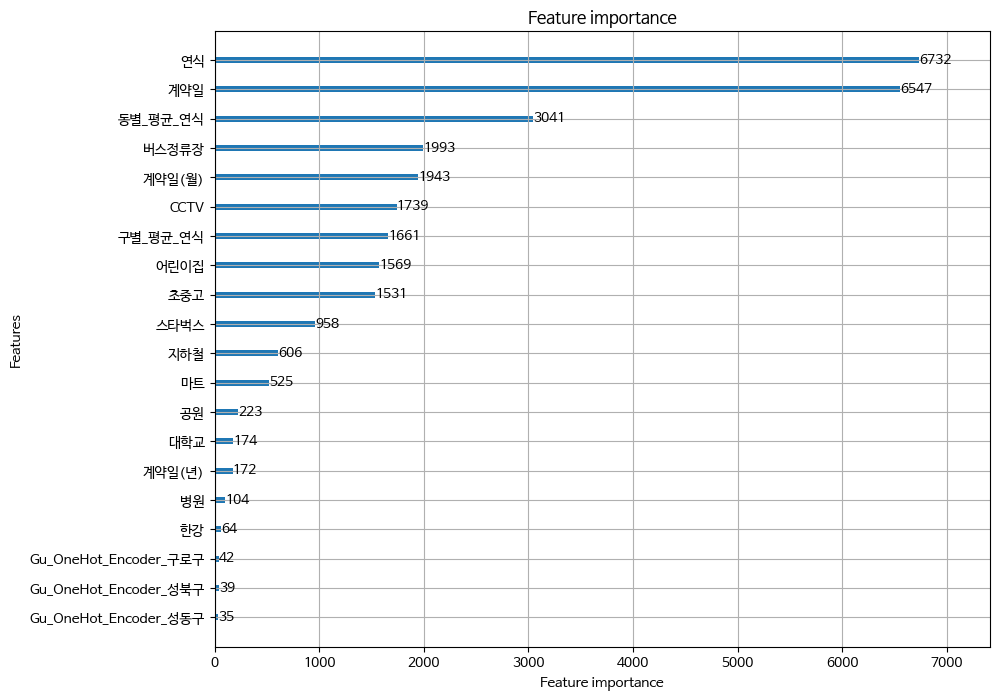

In [16]:
# 최적화된 하이퍼파라미터 적용
model_best = LGBMRegressor(subsample=0.6,
                          n_estimators=1000,
                          max_depth=20,
                          learning_rate=0.3,
                          lambda_l1=10,
                          lambda_l2=30,
                          random_state=11)
model_best.fit(X_train_log, y_train_log)

lgb.plot_importance(model_best, figsize=(10, 8), max_num_features=20)
plt.show()

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Absolute Error: 364.2173323914296
Mean Squared Error: 251728.32132205446
Root Mean Squared Error: 501.72534450838185
Mean Squared Log Error: 0.16831425972158304
R Squared: 0.4264875900773033
Mean Absolute Percentage Error: 35.126157303632745
Mean Percentage Error: -10.785756652692715
              실제값          예측값
동                             
가락동   1355.026463  1310.380589
가리봉동  1592.037918  1472.116755
가산동   1615.189899  1471.806726
가양동   1545.331495  1454.106145
가회동   1535.405834  1425.931296
...           ...          ...
효창동   1394.239655  1329.337922
후암동   1248.229947  1168.659491
휘경동   1649.695500  1518.012868
흑석동   1749.273757  1520.560238
흥인동  

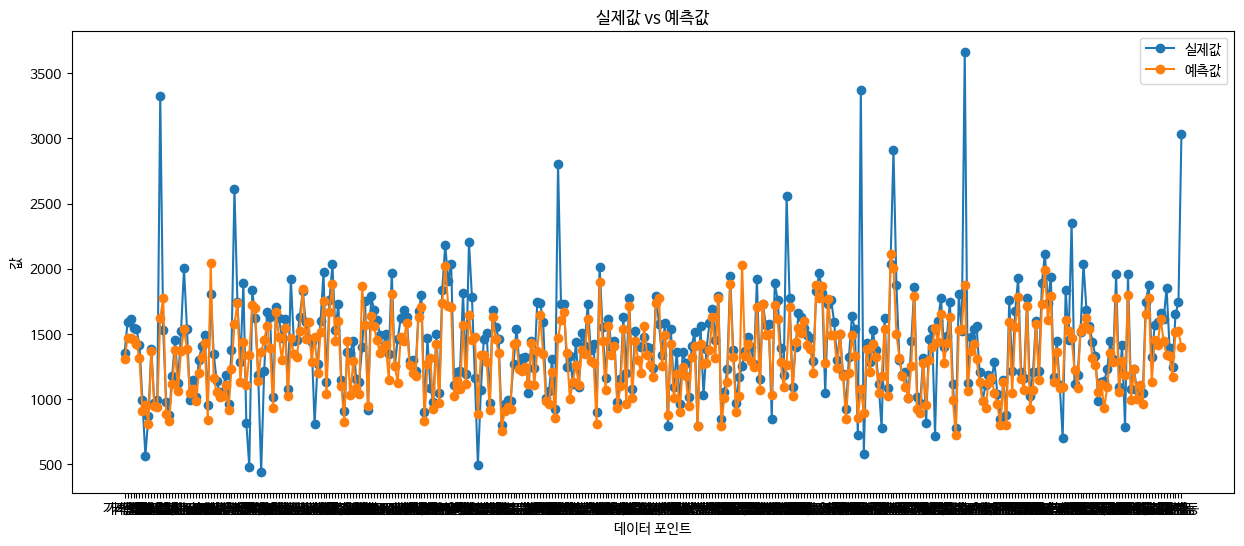

In [17]:
# 학습된 모델을 사용하여 예측
y_pred_log = model_best.predict(X_test_log)
y_pred = np.expm1(y_pred_log)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(15, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()